In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
meta = pd.read_csv("../../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [3]:
cell_lines_train = pd.read_csv(
    "../../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_train.txt",
    sep='\t')['Cell_line'].values
cell_lines_test = pd.read_csv(
    "../../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_test.txt",
    sep='\t')['Cell_line'].values

# CRISPR

In [4]:
crispr = pd.read_csv("../../data/crispr/final_crispr.csv.gz")

In [5]:
crispr = crispr.set_index('Gene')

In [6]:
crispr

,HEL,HCC-827,NCI-H1581,T24,NCI-H1693,U-118-MG,MV-4-11,GCIY,A673,KARPAS-299,...,PANC-10-05,PANC-04-03,PANC-02-03,OV-90,SNU-1,SW1088,SW1573,TOV-21G,T98G,C2BBe1
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.12228,-0.14840,-0.22644,-0.19368,-0.07416,-0.13952,-0.06369,-0.17434,-0.11102,-0.00409,...,-0.00653,-0.05449,-0.03721,-0.05632,-0.18148,-0.00390,-0.11492,-0.25082,-0.14007,-0.02537
A1CF,-0.06676,0.04694,-0.12357,0.01646,-0.09219,-0.03626,0.20422,0.26587,-0.05866,-0.06290,...,0.06266,0.03846,0.01334,-0.03609,0.02550,-0.12350,-0.12449,-0.04704,-0.12794,-0.06395
A2M,-0.04738,0.01823,-0.11768,-0.32711,-0.02917,-0.18112,0.07463,-0.06795,0.13849,0.04201,...,-0.06771,-0.02770,0.05723,0.00379,0.10457,-0.09896,-0.09706,0.00788,-0.07976,0.00849
A2ML1,-0.11845,0.06269,0.00131,0.02931,-0.04180,-0.16396,0.06597,0.24764,0.06359,0.12368,...,0.00618,0.04353,0.05205,-0.02384,0.01318,0.01886,0.01083,0.05061,0.04051,0.15309
A3GALT2,0.00583,0.12556,0.00524,0.06642,-0.09509,-0.07408,0.06802,0.00595,0.04275,-0.11596,...,-0.17139,-0.00978,-0.05992,-0.06299,0.00317,-0.12989,-0.01678,0.06876,-0.05376,0.00758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.10325,0.15758,0.16004,0.04769,0.15507,-0.01552,0.03123,-0.07182,0.18367,0.02978,...,0.05653,0.04788,0.06872,0.01035,-0.01380,-0.10008,-0.03668,0.05730,-0.10141,-0.05757
ZYG11B,-0.39658,0.09681,0.02453,0.06738,-0.08462,-0.03160,-0.01174,-0.17678,-0.07997,-0.04185,...,-0.07663,-0.03972,-0.11032,-0.05196,-0.08886,-0.19547,-0.19423,-0.05156,-0.09143,-0.29212
ZYX,0.05185,-0.16453,-0.13886,-0.06939,-0.09017,0.02340,-0.01664,-0.27411,-0.35996,-0.08719,...,-0.14009,-0.01752,0.16002,-0.18843,0.02069,-0.07902,-0.12511,-0.14371,-0.04241,0.03677


In [84]:
crispr[crispr['Gene']=='A1BG']

,Gene,HEL,HCC-827,NCI-H1581,T24,NCI-H1693,U-118-MG,MV-4-11,GCIY,A673,...,PANC-10-05,PANC-04-03,PANC-02-03,OV-90,SNU-1,SW1088,SW1573,TOV-21G,T98G,C2BBe1
0,A1BG,-0.12228,-0.1484,-0.22644,-0.19368,-0.07416,-0.13952,-0.06369,-0.17434,-0.11102,...,-0.00653,-0.05449,-0.03721,-0.05632,-0.18148,-0.0039,-0.11492,-0.25082,-0.14007,-0.02537


In [9]:
meta = meta.drop_duplicates(['Cell_line'])
meta = meta[meta['Cell_line'].isin(crispr.columns)]

In [11]:
meta.groupby('Cancer_type').size()

Cancer_type
Acute Myeloid Leukemia                12
B-Cell Non-Hodgkin's Lymphoma         10
B-Lymphoblastic Leukemia               3
Biliary Tract Carcinoma                2
Bladder Carcinoma                     13
Breast Carcinoma                      32
Burkitt's Lymphoma                     1
Cervical Carcinoma                     4
Chondrosarcoma                         1
Chronic Myelogenous Leukemia           3
Colorectal Carcinoma                  35
Endometrial Carcinoma                  9
Esophageal Carcinoma                   7
Esophageal Squamous Cell Carcinoma    23
Ewing's Sarcoma                       12
Gastric Carcinoma                     18
Glioblastoma                          27
Glioma                                13
Head and Neck Carcinoma               16
Hepatocellular Carcinoma              14
Hodgkin's Lymphoma                     2
Kidney Carcinoma                      11
Melanoma                              20
Mesothelioma                           6
Neur

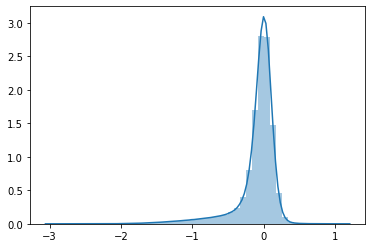

In [71]:
sns.distplot(crispr.values)

In [7]:
crispr.shape

(17995, 324)

In [75]:
crispr_train = [x for x in crispr.columns if x in cell_lines_train]

In [76]:
crispr_test = [x for x in crispr.columns if x in cell_lines_test]

In [80]:
len(crispr_train) / len(crispr.columns)

0.8249027237354085

In [79]:
len(crispr_test)

90

# CRISPR MOFA

In [85]:
crispr_mofa = pd.read_csv("../../data/crispr/MultiOmics_Sanger&CMRI_factors_largek.csv")

In [86]:
crispr_mofa.head()

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F91,F92,F93,F94,F95,F96,F97,F98,F99,F100
0,SIDM00329,0.89247,-0.26164,2.55549,0.14061,-0.74181,-0.74522,-0.28605,-0.36416,-0.37284,...,-0.18919,0.09110,-0.03820,-0.14565,-0.00794,-0.01876,0.00683,-0.03198,0.09770,-0.10606
1,SIDM00327,0.05840,0.34984,1.06271,-0.27806,0.11983,-1.21187,0.04718,-1.15267,-0.38571,...,-0.13013,-0.05368,-0.11542,0.33053,0.02041,0.13066,0.26742,0.04307,0.02258,0.01738
2,SIDM00502,1.58031,-1.03620,2.74966,1.09904,-3.13525,0.15303,-0.50745,-0.65733,0.83371,...,0.03882,-0.16215,0.06456,-0.08688,-0.05886,0.12894,0.13046,-0.11970,0.09336,0.02341
3,SIDM00793,0.42227,1.19794,-1.04763,-0.19029,-0.43119,0.13643,0.28086,-1.18233,-0.94091,...,0.01572,-0.17971,0.06922,-0.07030,0.12325,0.23680,0.00668,0.00656,-0.04272,-0.00965
4,SIDM01251,-0.37296,0.02504,1.27587,-0.39218,-0.78175,-0.96252,-0.02489,0.54585,1.80955,...,0.09861,0.09448,-0.05634,-0.04757,0.08891,0.23964,0.09682,0.04677,-0.04439,-0.05803
